# 1. Cargando el conjunto de datos

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

14082048/17464789 ━━━━━━━━━━━━━━━━━━━━ 16s 5us/step

In [11]:
# Indices de las palabras
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
# Primera reseña del conjunto de datos de entrenamiento
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [19]:
reversed_word_index = {v:k for k,v in word_index.items()}
' '.join([reversed_word_index.get(i - 3, '({})'.format(i)) for i in train_data[0]])

"(1) this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert (2) is an amazing actor and now the same being director (2) father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for (2) and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also (2) to the two little boy's that played the (2) of norman and paul they were just brilliant children are often left out of the (2) list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

In [20]:
print(train_labels[0])

1


# 2. Preprocesamiento del conjunto de datos

In [21]:
import numpy as np
# Vectorizamos las reseñas convirtiendolas en vectores de 10.000 valores 1s y 0s

def vectorize(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i,j in enumerate(train_data):
        results[i,j] = 1
    return results

In [24]:
X_train = vectorize(train_data, 10000)
X_test = vectorize(test_data, 10000)
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], shape=(25000, 10000))

# 3. División del conjunto de datos

In [26]:
from sklearn.model_selection import train_test_split
X_test, X_val, Y_test, Y_val = train_test_split(X_test, test_labels, test_size=0.5)

In [27]:
print(f"Longitud subconjunto de entrenamiento: {len(X_train)}")
print(f"Longitud subconjunto de validacion: {len(X_val)}")
print(f"Longitud subconjunto de pruebas: {len(X_test)}")

Longitud subconjunto de entrenamiento: 25000
Longitud subconjunto de validacion: 12500
Longitud subconjunto de pruebas: 12500


# 4. Construcción de la red neuronal artificial

In [42]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

c:\Users\franc\Desktop\Proyectos Ciencia de datos\Classification of feelings\Classification-of-feelings\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
history = model.fit(
    X_train,
    train_labels,
    epochs=40,
    validation_data=(X_val, Y_val)
)

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.5309 - accuracy: 0.5253 - loss: 0.6915 - val_Precision: 0.4972 - val_accuracy: 0.4966 - val_loss: 0.6939
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.6592 - accuracy: 0.6312 - loss: 0.6747 - val_Precision: 0.4977 - val_accuracy: 0.4964 - val_loss: 0.6981
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.7315 - accuracy: 0.7307 - loss: 0.6367 - val_Precision: 0.4945 - val_accuracy: 0.4930 - val_loss: 0.7077
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.7725 - accuracy: 0.7765 - loss: 0.5916 - val_Precision: 0.4965 - val_accuracy: 0.4947 - val_loss: 0.7273
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.7912 - accuracy: 0.8006 - loss: 0.5447 - val_Precision: 0.4962 - val_accuracy: 0.4946 - val_loss: 0.7588
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.8073 - accuracy: 0.8168 - loss: 0.5001 - val_Precision: 0.4963 - val_accu

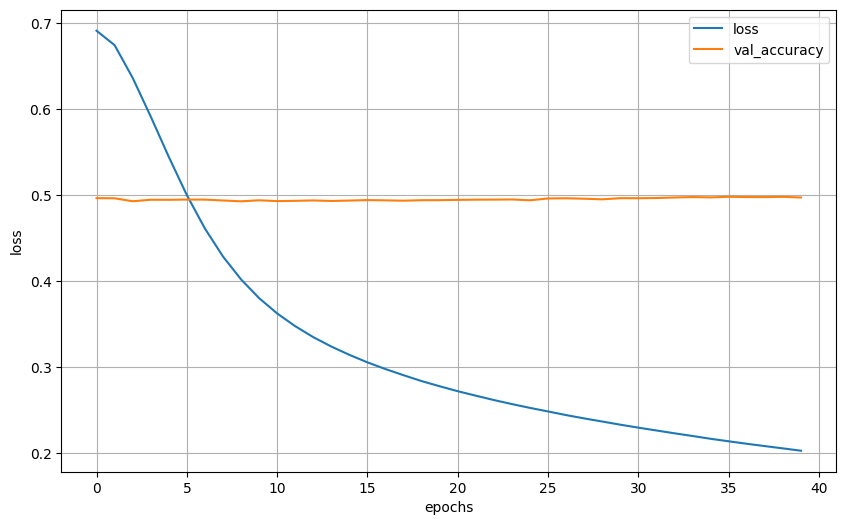

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history)[['loss','val_accuracy']].plot(figsize=(10,6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
